In [1]:
# importing libraries 
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#read de df
df = pd.read_csv(r'C:\Users\juani\Downloads\movies.csv\movies.csv')

In [3]:
df.head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [3]:
# missing data? 

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%' .format(col, percent_missing))
    df = df.dropna()

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [4]:
# type of data for columns 
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
#chage some dtypes
df['budget'] = df['budget'].astype('float64')

df['votes'] = df['budget'].astype('float64')

df['gross'] = df['gross'].astype('float64')

In [12]:
df.dtypes

name              object
rating            object
genre             object
year               int64
released          object
score            float64
votes            float64
director          object
writer            object
star              object
country           object
budget           float64
gross            float64
company           object
runtime          float64
yearcorrected     object
yearcorrect        int32
dtype: object

In [13]:
#correct year 
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,19000000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,4500000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,980 (,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,18000000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,3500000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,980 (,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,6000000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,90000000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,"7, 20",2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,85000000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,"14, 2",2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,175000000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,"7, 20",2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,135000000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,"21, 2",2020


In [14]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,237000000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"18, 2",2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,356000000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,200000000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"19, 1",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,245000000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"18, 2",2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,321000000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3000000.0,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000.0,5.073000e+03,Two Prong Lesson,96.0,"5, 20",2015
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,5000000.0,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000.0,2.970000e+03,Trimark Pictures,97.0,994 (,1994
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,5000000.0,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000.0,2.554000e+03,Copperheart Entertainment,108.0,001 (,2001
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,800000.0,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000.0,2.270000e+03,Embassy Pictures,85.0,1982,1982


In [15]:
#duplicates?
df.drop_duplicates()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,19000000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,4500000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,980 (,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,18000000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,3500000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,980 (,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,6000000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,2020,"January 17, 2020 (United States)",6.6,90000000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,"7, 20",2020
7649,Sonic the Hedgehog,PG,Action,2020,"February 14, 2020 (United States)",6.5,85000000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,"14, 2",2020
7650,Dolittle,PG,Adventure,2020,"January 17, 2020 (United States)",5.6,175000000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,"7, 20",2020
7651,The Call of the Wild,PG,Adventure,2020,"February 21, 2020 (United States)",6.8,135000000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,"21, 2",2020


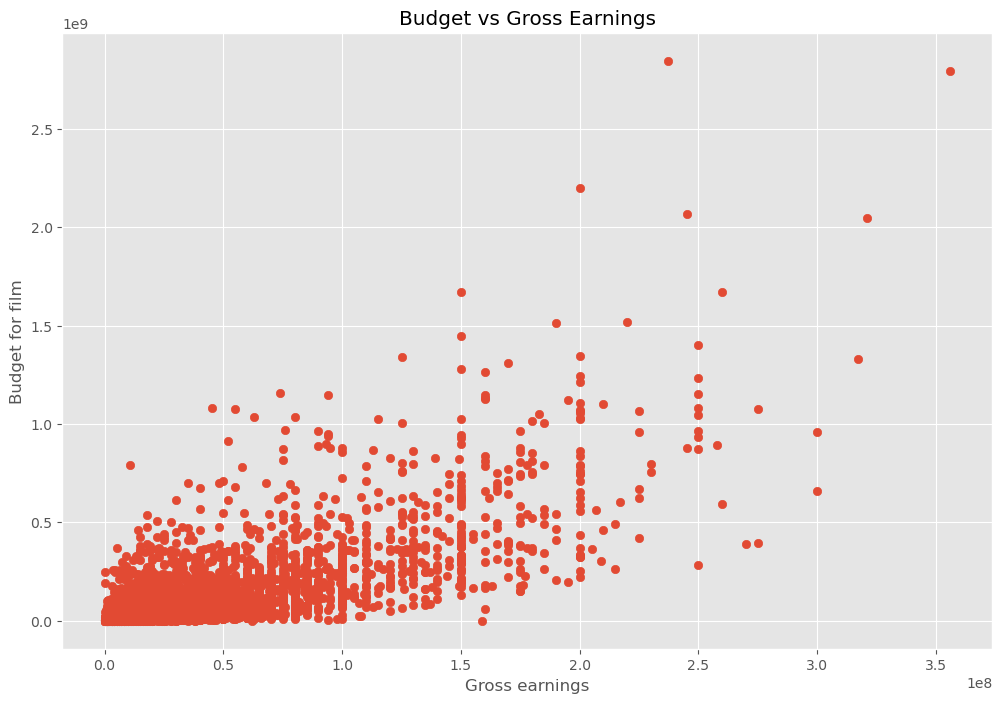

In [16]:
#scatter budget vs gross
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross earnings')
plt.ylabel('Budget for film')
plt.show()

In [17]:
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,19000000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,4500000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,980 (,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,18000000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,3500000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,980 (,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,6000000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,550000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0,80 (U,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,27000000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0,1980,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,18000000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0,"19, 1",1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,54000000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0,1981,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0,980 (,1980


<AxesSubplot:xlabel='gross', ylabel='budget'>

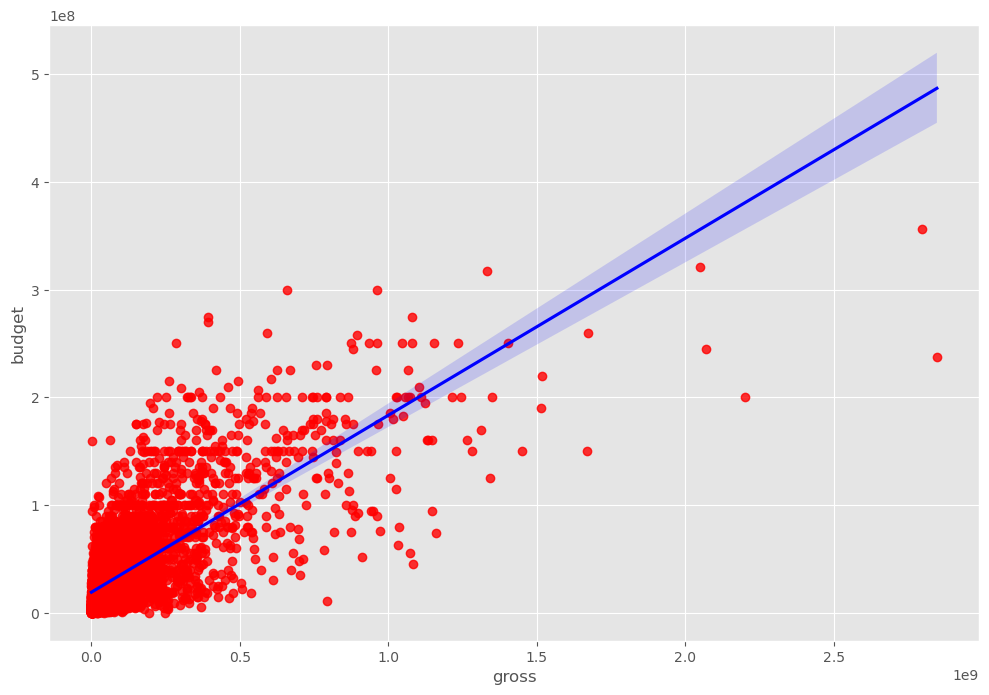

In [44]:

# budget vs gross plot
sns.regplot(x='gross', y='budget', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [23]:
#looking for correlation
df.corr(method = 'pearson')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.327722,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.072001,0.072001,0.222556,0.414068,0.061923
votes,0.327722,0.072001,1.000000,1.000000,0.740247,0.318695,0.320312
budget,0.327722,0.072001,1.000000,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.740247,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.318695,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.320312,0.320312,0.268721,0.075294,1.000000


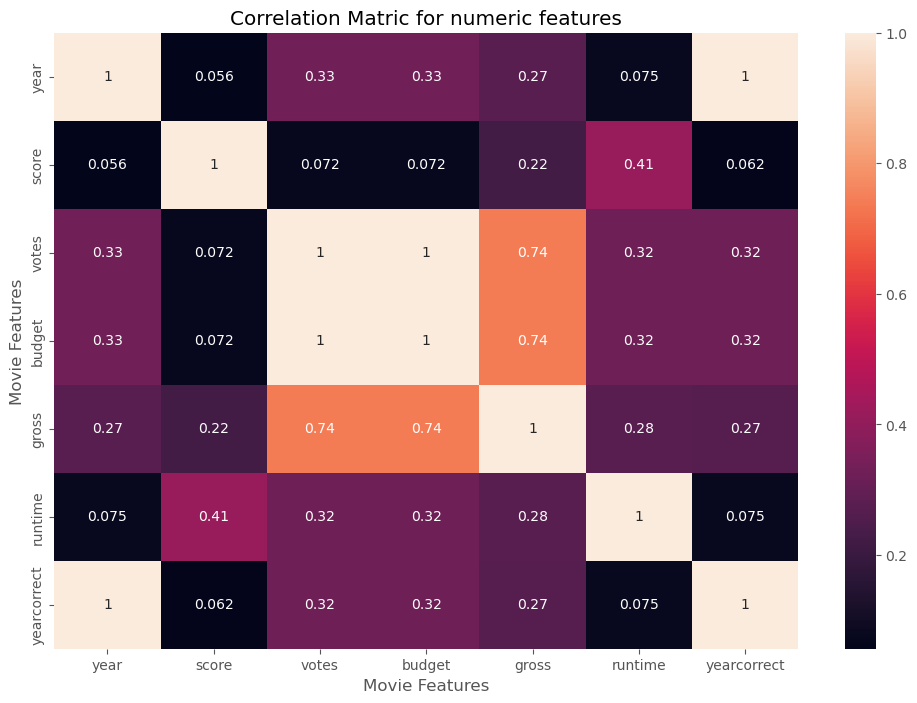

In [29]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()

In [27]:
#looking for correlation
df.corr(method = 'kendall')

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.039389,0.220833,0.220833,0.239539,0.064824,0.991304
score,0.039389,1.000000,-0.006406,-0.006406,0.124943,0.292254,0.043400
votes,0.220833,-0.006406,1.000000,1.000000,0.512057,0.231278,0.213719
budget,0.220833,-0.006406,1.000000,1.000000,0.512057,0.231278,0.213719
gross,0.239539,0.124943,0.512057,0.512057,1.000000,0.176979,0.232372
runtime,0.064824,0.292254,0.231278,0.231278,0.176979,1.000000,0.064793
yearcorrect,0.991304,0.043400,0.213719,0.213719,0.232372,0.064793,1.000000


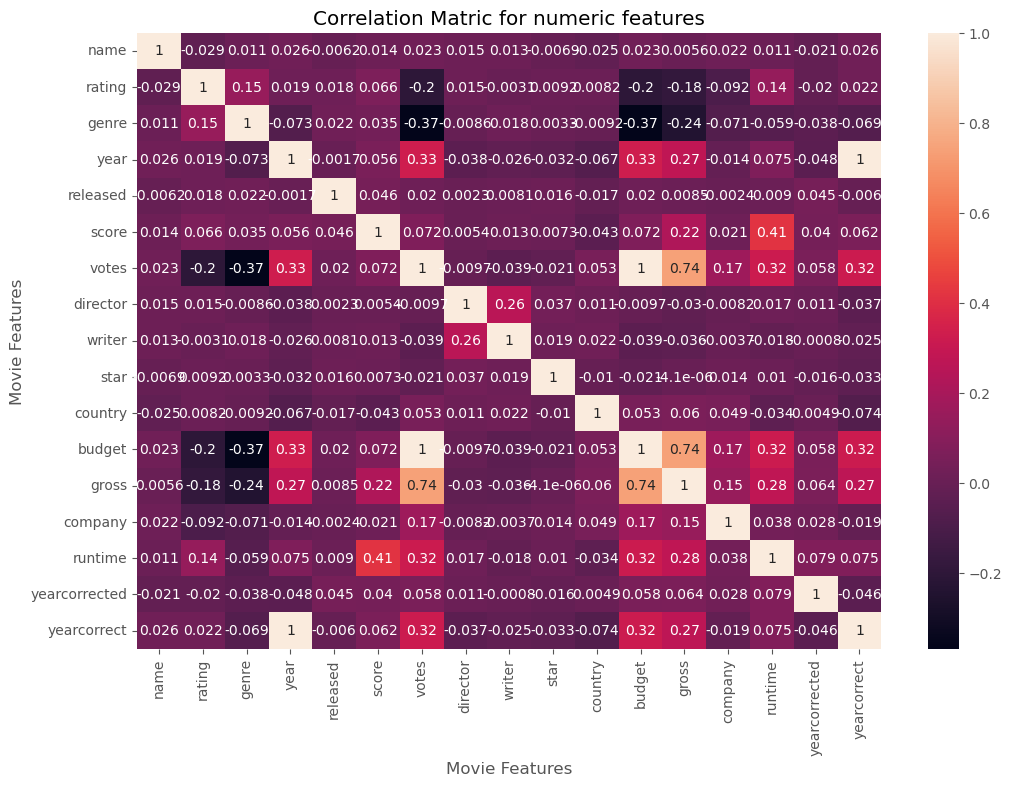

In [34]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for numeric features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [40]:
##company
df_numerized = df.copy()

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
df_numerized  

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected,yearcorrect
0,4692,6,6,1980,1304,8.4,19000000.0,1795,2832,699,46,19000000.0,46998772.0,1426,146.0,156,1980
1,3929,6,1,1980,1127,5.8,4500000.0,1578,1158,214,47,4500000.0,58853106.0,452,104.0,253,1980
2,3641,4,0,1980,1359,8.7,18000000.0,757,1818,1157,47,18000000.0,538375067.0,945,124.0,156,1980
3,204,4,4,1980,1127,7.7,3500000.0,889,1413,1474,47,3500000.0,83453539.0,1108,88.0,253,1980
4,732,6,4,1980,1170,7.3,6000000.0,719,351,271,47,6000000.0,39846344.0,1083,98.0,156,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,904,6.6,90000000.0,16,2390,1812,47,90000000.0,426505244.0,452,124.0,230,2020
7649,3556,4,0,2020,713,6.5,85000000.0,852,2309,147,47,85000000.0,319715683.0,1108,99.0,140,2020
7650,1153,4,1,2020,904,5.6,175000000.0,1809,2827,1470,47,175000000.0,245487753.0,1397,101.0,230,2020
7651,3978,4,1,2020,758,6.8,135000000.0,294,2091,640,6,135000000.0,111105497.0,12,100.0,201,2020


In [41]:
df_numerized.corr()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrected,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.023392,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,-0.020907,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,-0.203946,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,-0.019529,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.368523,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.037908,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.327722,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,-0.047605,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.019952,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,0.044979,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.072001,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.040177,0.061923
votes,0.023392,-0.203946,-0.368523,0.327722,0.019952,0.072001,1.000000,-0.009662,-0.039466,-0.021473,0.052977,1.000000,0.740247,0.170235,0.318695,0.058284,0.320312
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.009662,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,0.010836,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.039466,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.000802,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.021473,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.015640,-0.032687


In [49]:
correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

name         name             1.000000
             rating          -0.029234
             genre            0.010996
             year             0.025542
             released        -0.006152
                                ...   
yearcorrect  gross            0.268721
             company         -0.018806
             runtime          0.075294
             yearcorrected   -0.046109
             yearcorrect      1.000000
Length: 289, dtype: float64

In [46]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs 

genre        votes         -0.368523
             budget        -0.368523
votes        genre         -0.368523
budget       genre         -0.368523
genre        gross         -0.244101
                              ...   
budget       budget         1.000000
gross        gross          1.000000
company      company        1.000000
director     director       1.000000
yearcorrect  yearcorrect    1.000000
Length: 289, dtype: float64

In [50]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes          gross            0.740247
gross          budget           0.740247
               votes            0.740247
budget         gross            0.740247
year           yearcorrect      0.998726
yearcorrect    year             0.998726
name           name             1.000000
writer         writer           1.000000
runtime        runtime          1.000000
rating         rating           1.000000
genre          genre            1.000000
year           year             1.000000
released       released         1.000000
score          score            1.000000
votes          votes            1.000000
yearcorrected  yearcorrected    1.000000
votes          budget           1.000000
star           star             1.000000
country        country          1.000000
budget         votes            1.000000
               budget           1.000000
gross          gross            1.000000
company        company          1.000000
director       director         1.000000
yearcorrect    y